In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

# read train/test data

In [2]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

In [3]:
data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")

# shapes of train/test datasets

In [4]:
print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (48744, 121)
Train shape: (307511, 122)


# sample of train dataset

In [5]:
data_train.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
190515,320894,0,Cash loans,F,N,N,1,225000.0,651816.0,21672.0,495000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018801,-13550,-4808,-7432.0,-621,NaN,1,1,0,1,0,0,Core staff,3.0,2,2,TUESDAY,12,0,0,0,0,0,0,Medicine,NaN,0.697941,NaN,0.1485,0.1047,0.9791,0.7144,0.0566,0.16,0.1379,0.3333,0.3750,0.0356,0.1210,0.1495,0.0000,0.0000,0.1513,0.1087,0.9791,0.7256,0.0571,0.1611,0.1379,0.3333,0.3750,0.0364,0.1322,0.1558,0.0000,0.0000,0.1499,0.1047,0.9791,0.7182,0.0570,0.16,0.1379,0.3333,0.3750,0.0362,0.1231,0.1522,0.000,0.0000,reg oper spec account,block of flats,0.1486,Panel,No,0.0,0.0,0.0,0.0,-1319.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
94909,210209,0,Cash loans,M,N,N,0,270000.0,640080.0,29970.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.003818,-8414,-1063,-2761.0,-1091,NaN,1,1,0,1,1,0,Laborers,2.0,2,2,FRIDAY,4,0,0,0,0,0,0,Business Entity Type 3,NaN,0.155643,0.501075,0.0082,0.0000,0.9742,0.6464,0.0018,0.00,0.0345,0.0417,0.0833,0.0097,0.0067,0.0054,0.0000,0.0000,0.0084,0.0000,0.9742,0.6602,0.0019,0.0000,0.0345,0.0417,0.0833,0.0100,0.0073,0.0056,0.0000,0.0000,0.0083,0.0000,0.9742,0.6511,0.0019,0.00,0.0345,0.0417,0.0833,0.0099,0.0068,0.0055,0.000,0.0000,reg oper account,block of flats,0.0053,Block,No,1.0,0.0,1.0,0.0,-755.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
178858,307265,0,Cash loans,M,Y,Y,0,157500.0,450000.0,21780.0,450000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.026392,-10870,-741,-4779.0,-3535,10.0,1,1,0,1,0,0,Laborers,1.0,2,2,FRIDAY,9,0,0,0,0,1,1,Business Entity Type 3,NaN,0.651847,0.535276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# train data types

In [6]:
# types of features
data_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
# drop id and target column
data_train_drop = data_train.drop(labels=["SK_ID_CURR", "TARGET"], axis=1)

## total amount and percentageof missing values

In [8]:
# missing data check
# won't use data with high percentege of missed entries
nulled_values = data_train.isnull()
total_missed = nulled_values.sum().sort_values(ascending=False)
percent_missed = (nulled_values.sum()/nulled_values.count()*100).sort_values(ascending=False)

total_percent_missed_train = pd.concat([total_missed, percent_missed], axis=1,
                                      keys=["Total amount", "Percent missed"])

total_percent_missed_train

,Total amount,Percent missed
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


# check for duplicates

In [14]:
data_train[data_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


# non-missing values

In [15]:
no_missing_data_train = total_percent_missed_train.loc[total_percent_missed_train["Total amount"] == 0,:]

In [16]:
no_missing_data_train

,Total amount,Percent missed
AMT_CREDIT,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_EMAIL,0,0.0
TARGET,0,0.0
FLAG_PHONE,0,0.0
FLAG_CONT_MOBILE,0,0.0
FLAG_WORK_PHONE,0,0.0
FLAG_EMP_PHONE,0,0.0
FLAG_MOBIL,0,0.0
NAME_CONTRACT_TYPE,0,0.0


# unique categorical classes

In [19]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# distributions

In [20]:
data_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

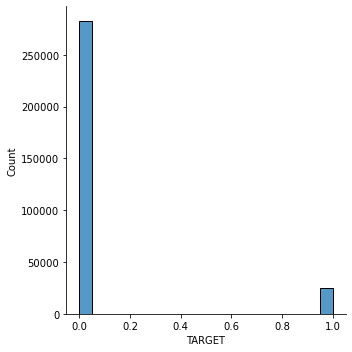

In [21]:
sns.displot(data_train["TARGET"], kde=False)
# data is waaay imbalanced

array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_EMAIL'}>,
        <AxesSubplot:title={'center':

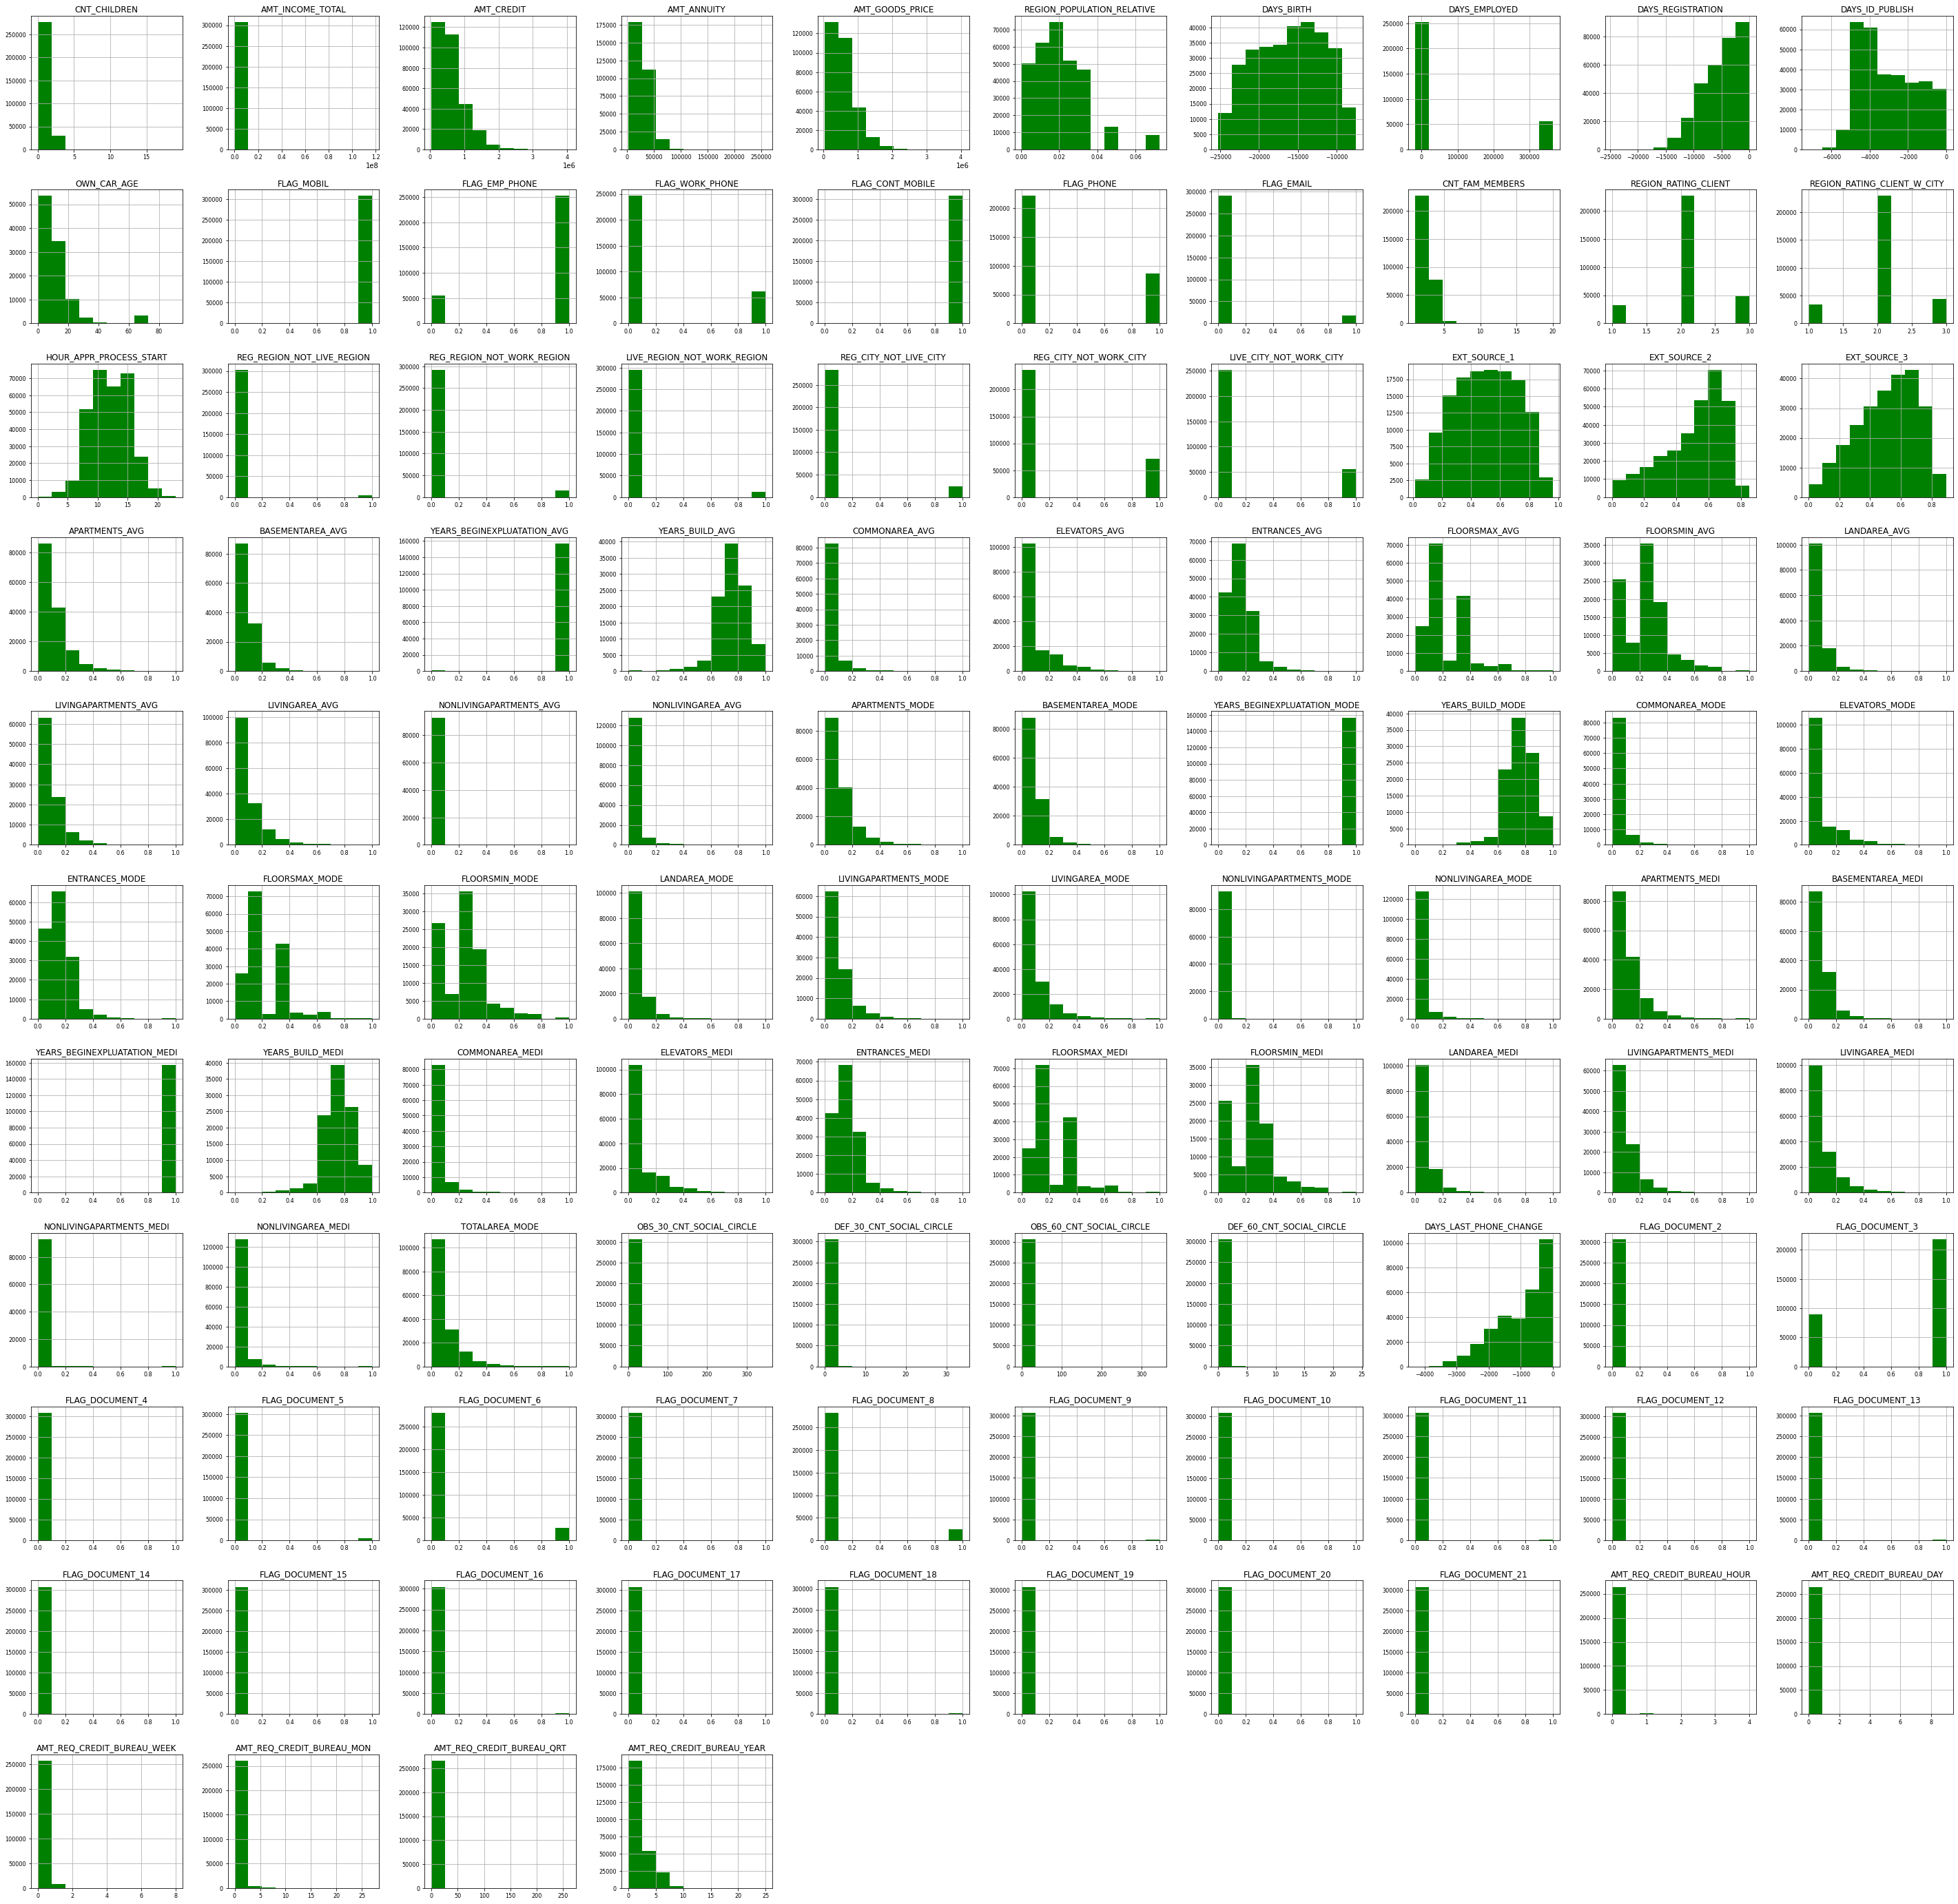

In [24]:
# idk how to fix output of "array([[...)"
data_train[numerical_features].hist(figsize=(50,50),color='g', bins=10, xlabelsize=8, ylabelsize=8)

In [23]:
# these features are chosen to build the model
numerical_features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","DAYS_EMPLOYED","DAYS_BIRTH","AMT_GOODS_PRICE"]
categorical_features = ["CODE_GENDER", "NAME_CONTRACT_TYPE","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"]

# OUTLIERS

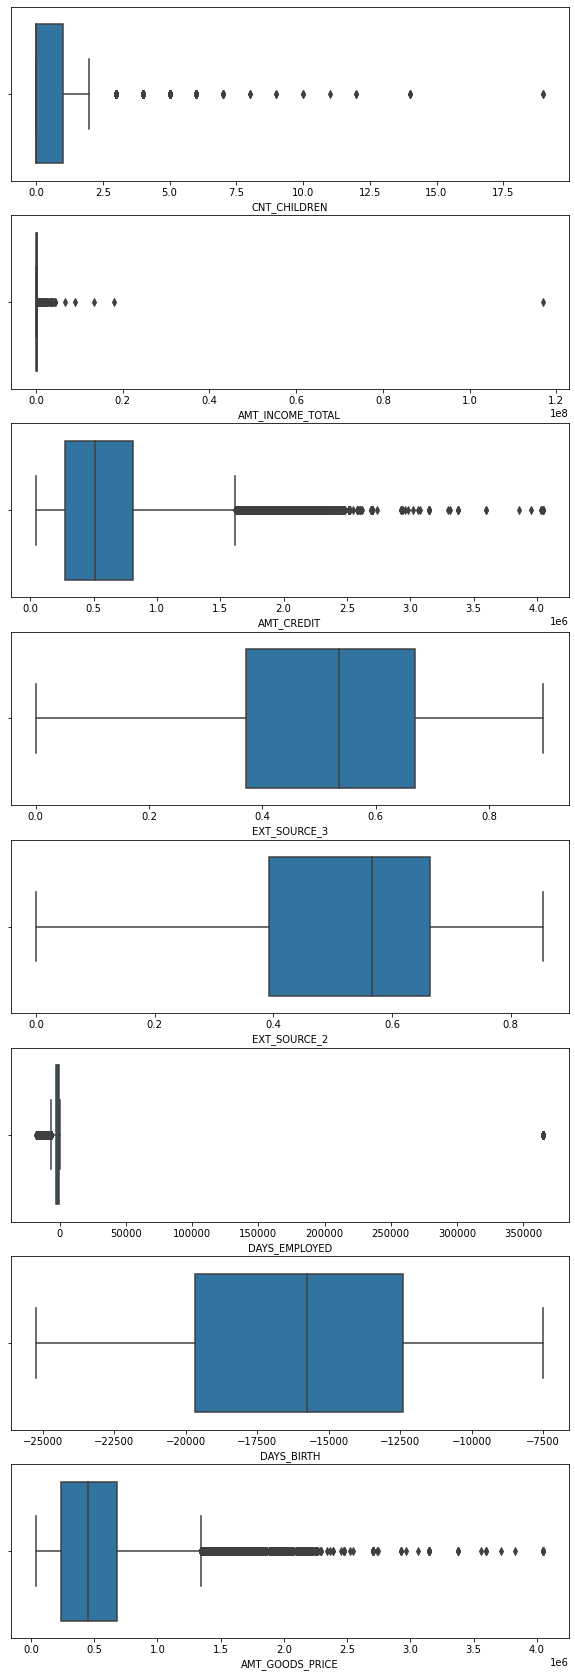

In [24]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,30)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=data_train[col], ax=axes[i])
plt.show()

In [88]:
# IQR score
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3-Q1
print(IQR)

SK_ID_CURR                      178997.750000
CNT_CHILDREN                         1.000000
AMT_INCOME_TOTAL                112500.000000
AMT_CREDIT                      414360.000000
AMT_ANNUITY                      19417.500000
AMT_GOODS_PRICE                 405000.000000
REGION_POPULATION_RELATIVE           0.018657
DAYS_BIRTH                        7141.000000
DAYS_EMPLOYED                     2614.000000
DAYS_REGISTRATION                 5558.250000
DAYS_ID_PUBLISH                   2742.000000
OWN_CAR_AGE                         11.000000
FLAG_MOBIL                           0.000000
FLAG_EMP_PHONE                       0.000000
FLAG_WORK_PHONE                      0.000000
FLAG_CONT_MOBILE                     0.000000
FLAG_PHONE                           1.000000
FLAG_EMAIL                           0.000000
CNT_FAM_MEMBERS                      1.000000
REGION_RATING_CLIENT                 0.000000
REGION_RATING_CLIENT_W_CITY          0.000000
HOUR_APPR_PROCESS_START           

# HISTS

array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>, <AxesSubplot:>]],
      dtype=object)

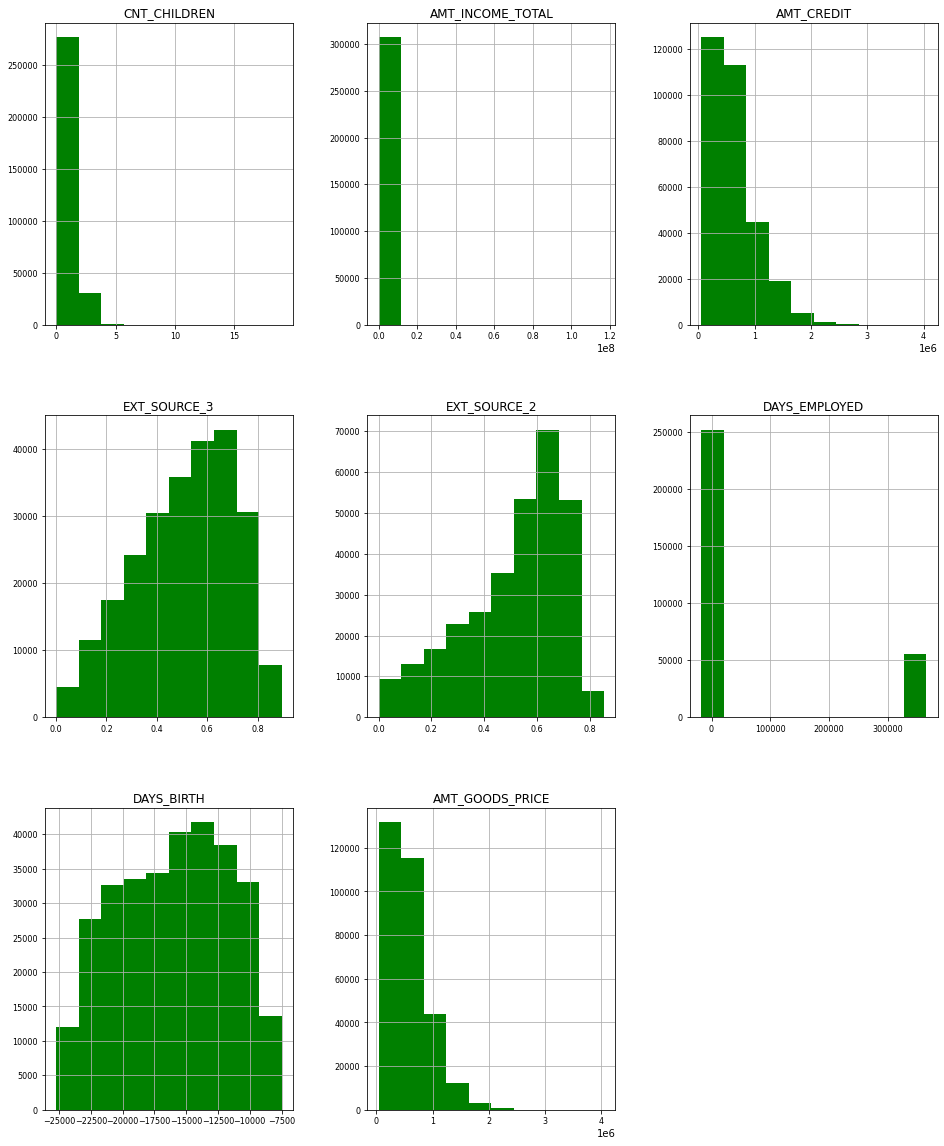

In [25]:
data_train[numerical_features].hist(figsize=(16,20),color='g', bins=10, xlabelsize=8, ylabelsize=8)

# Correlation Matrix

<AxesSubplot:>

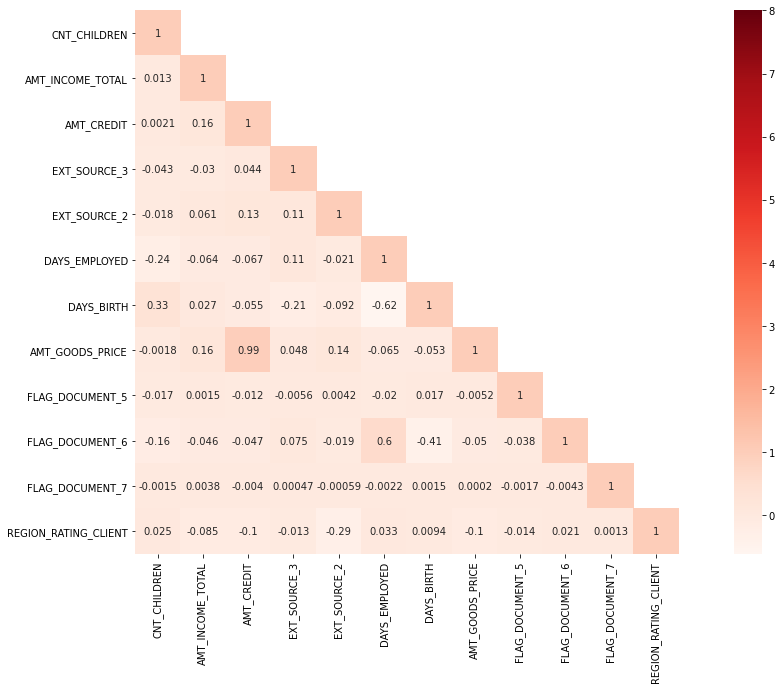

In [75]:
numerical_features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","DAYS_EMPLOYED","DAYS_BIRTH","AMT_GOODS_PRICE"]
categorical_features = ["CODE_GENDER", "NAME_CONTRACT_TYPE","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"]
flags = ["FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7"]

interesting_features = ["REGION_RATING_CLIENT"]

corrMatt = data_train[categorical_features+numerical_features  + flags + interesting_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Reds", mask=mask, vmax=8, square=True, annot=True)

# ok, AMT_CREDIT has 99 percent corellation coeficient w/ AMT_GOODS_PRICE
# let's drop AMT_GOODS_PRICE then
# also drop CNT_CHILDREN
# also drop DAYS_EMPLOYED

<AxesSubplot:>

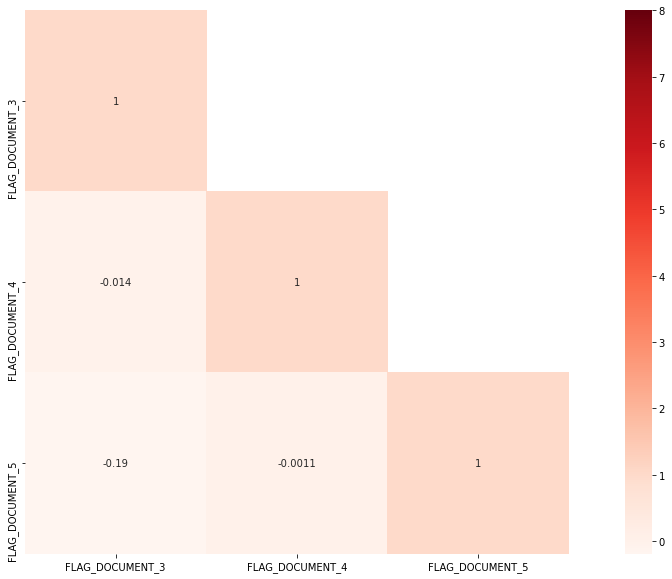

In [53]:
additional_categorical_features_flag_doc = list()
for i in range(2,22):
    additional_categorical_features_flag_doc.append(f"FLAG_DOCUMENT_{i}")
    
corrMatt = data_train[additional_categorical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Reds", mask=mask, vmax=8, square=True, annot=True)

#also add flag_doc3,4,5

# feature selection & data preparetion

In [76]:
# read again and the data won't be corrupted
# by my miserable attempts to EDA-it above
data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")

# %missing in train

# picked those features
# because they are mostly concern money => loans
# and also this features are mostly present in the train dataset :)

features = [
    "TARGET",
    "CODE_GENDER",
    "NAME_CONTRACT_TYPE", # loan or relvolving
    "FLAG_OWN_CAR",
    "CNT_CHILDREN",
    "FLAG_OWN_REALTY", #flag has a house or flat
    "AMT_INCOME_TOTAL", #total income of client
    "AMT_CREDIT", #credit amount of the client's loan
    "EXT_SOURCE_3", #score from external datasource  (~19.8% of values)
    "EXT_SOURCE_2", #extsource1 is half empty though (~0.2% of missing values)
    "DAYS_EMPLOYED",
    "DAYS_BIRTH",
    "NAME_EDUCATION_TYPE", #level of highest education the client achived
    "NAME_INCOME_TYPE", #where client gets money from
    "AMT_GOODS_PRICE",# (~0.09% missing)
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_7",
    "REGION_RATING_CLIENT"
    
 ]

selected_train_data = data_train[features]
features.remove("TARGET") #no target in test
selected_test_data = data_test[features]


In [95]:
# this features will be used to predict the targets
numerical_features = ["AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","DAYS_BIRTH", "REGION_RATING_CLIENT"]
categorical_features = ["CODE_GENDER", "NAME_CONTRACT_TYPE","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5", "FLAG_DOCUMENT_7"]

In [96]:
# missing data in test
nulled_test_values = selected_test_data.isnull()
total_missed_selected_test = nulled_test_values.sum().sort_values(ascending=False)
percent_missed_selected_test = (nulled_test_values.sum()/nulled_test_values.count()*100).sort_values(ascending=False)

total_percent_missed_selected_test = pd.concat([total_missed_selected_test, percent_missed_selected_test], axis=1,
                                      keys=["Total amount", "Percent missed"])

total_percent_missed_selected_test

,Total amount,Percent missed
EXT_SOURCE_3,8668,17.782701
EXT_SOURCE_2,8,0.016412
REGION_RATING_CLIENT,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
FLAG_OWN_CAR,0,0.000000
CNT_CHILDREN,0,0.000000
FLAG_OWN_REALTY,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
DAYS_EMPLOYED,0,0.000000


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#prepare pipeline for numerical (missing->mean, scale->standard)
numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

#pipeline for categorical (missing->fill with constant -> one-hotncoding)
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# object that helps us tranform our data
# without manually doing this boring and error-prone steps
# I've done many attemps to clear this manually
# but I faced a lot of difficulties so
# thanks google for easy and elegant solution :) (https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [124]:
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3-Q1

# apply IQR filter
data_train_dirty = data_train[numerical_features + categorical_features + ["TARGET"]]
data_train_clean = data_train_dirty[~((data_train_dirty < (Q1 - 1.5 * IQR)) |
                                    (data_train_dirty > (Q3 + 1.5 * IQR))).any(axis=1)]

prepr.fit(data_train_clean.drop("TARGET",axis=1))

train_x = prepr.transform(data_train_clean.drop("TARGET",axis=1))
test_x = prepr.transform(data_test[numerical_features + categorical_features])

train_y = data_train_clean["TARGET"]

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)


train_x: (151643, 28)
train_y: (151643,)
test_x: (48744, 28)


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [126]:
train_split_x, validate_x, train_split_y, validate_y =train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (121314, 28), (121314,)
Validation: (30329, 28), (30329,)


# LOGISTIC REGRESSION

In [127]:
# changing tolerance
# class_weight = balanced (automatically adjust weight inversely proportional to class frequencies in the input data)
ROUNDS = 2
for i in range(1,ROUNDS + 1):
  print(f"ROUND {i} [tol={1/(i*100)}] ")
  lr = LogisticRegression(class_weight="balanced", tol = 1/(i*100), max_iter=1000)
  lr.fit(train_split_x, train_split_y)
  train_preds = lr.predict(train_split_x)
  print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
  test_preds = lr.predict(validate_x)
  print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

ROUND 1 [tol=0.01] 
Train ROC_AUC: 0.6628229898468116
Validation ROC_AUC: 0.6693422214485707
ROUND 2 [tol=0.005] 
Train ROC_AUC: 0.6628229898468116
Validation ROC_AUC: 0.6693422214485707


# RANDOM FOREST CLASSIFIER

In [128]:
# model isn't changing 
# let's try another one

# picked random forest due to really stunning algorithm
# thank God I we don't need to implement it 

# amount of rolls
# this classifier is too heavy
ROUNDS = 10
for i in range(1,ROUNDS + 1):
  print(f"ROUND {i} [max_depth={i}]")
  lr = RandomForestClassifier(class_weight="balanced", max_depth=i)
  lr.fit(train_split_x, train_split_y)
  train_preds = lr.predict(train_split_x)
  print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
  test_preds = lr.predict(validate_x)
  print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

ROUND 1 [max_depth=1]
Train ROC_AUC: 0.6406284250910559
Validation ROC_AUC: 0.6422028399635701
ROUND 2 [max_depth=2]
Train ROC_AUC: 0.6546129547051702
Validation ROC_AUC: 0.6542096755400267
ROUND 3 [max_depth=3]
Train ROC_AUC: 0.6574316678584929
Validation ROC_AUC: 0.6584902780547245
ROUND 4 [max_depth=4]
Train ROC_AUC: 0.662326386630321
Validation ROC_AUC: 0.6597209735972323
ROUND 5 [max_depth=5]
Train ROC_AUC: 0.6652897468558089
Validation ROC_AUC: 0.6631369278175119
ROUND 6 [max_depth=6]
Train ROC_AUC: 0.6715811869153269
Validation ROC_AUC: 0.6679723558372076
ROUND 7 [max_depth=7]
Train ROC_AUC: 0.677297699092167
Validation ROC_AUC: 0.6659581928102509
ROUND 8 [max_depth=8]
Train ROC_AUC: 0.686607664433232
Validation ROC_AUC: 0.6651731819907107
ROUND 9 [max_depth=9]
Train ROC_AUC: 0.6953540798424704
Validation ROC_AUC: 0.6642569392428975
ROUND 10 [max_depth=10]
Train ROC_AUC: 0.7103954222010616
Validation ROC_AUC: 0.6591028229079873


In [132]:
# pick logistic

clr = LogisticRegression(class_weight="balanced", max_iter=1000,tol=0.01)
clr.fit(train_split_x, train_split_y)

train_preds = clr.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = clr.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.6628229898468116
Validation ROC_AUC: 0.6693422214485707


In [133]:
#get probs for test data
probs = clr.predict_proba(test_x)

In [134]:
#save to disk
pd.DataFrame({
    "SK_ID_CURR": data_test["SK_ID_CURR"],
    "TARGET": [pr[1] for pr in probs]
}).to_csv("./my_results.csv",index=False)